## Linear regression using the Normal Equation

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
data = load_boston()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

C:\Users\mxp180004\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datas

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)



In [3]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))




0.7697699488741149
0.6354638433202124


### r2-score
$$r2 = 1 - \frac{SS_{res}}{SS_{total}}$$
$$SS_{res} = \sum_i (y_i - y_{mean})^2$$
$$SS_{total} = \sum_i (y_i - \hat{y}_i)^2$$
where $y_{mean}$ is the average of all target values, and $\hat{y}_i$ is the prediction of instance $i$. $y_i$ is the actual target value of instance $i$. 

Text(0.5, 0, 'RM')

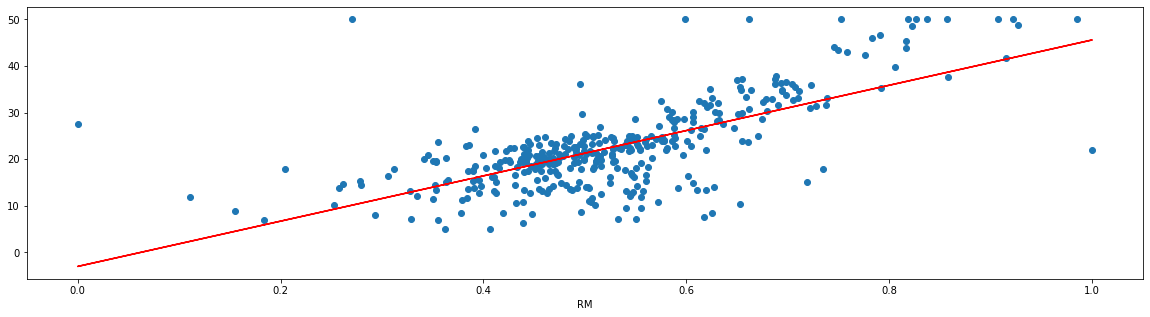

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,5].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.subplots(figsize = (20,5))
plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')



## SGD Regressor

In [5]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, max_iter = 100, learning_rate = 'constant', eta0 = 0.05, shuffle = False)
sgd_reg.fit(X_train, y_train)
print(sgd_reg.score(X_train, y_train))
print(sgd_reg.score(X_test, y_test))




0.7668600359911643
0.6478290962668116


In [6]:
sgd_reg.coef_



array([-10.8575032 ,   4.00351983,  -0.19687207,   3.42572972,
        -6.89545099,  19.69273279,  -0.88743205, -15.28692342,
         5.70921757,  -5.00459715,  -9.71931376,   3.31948073,
       -17.27534717])

In [7]:
sgd_reg.intercept_



array([27.0920546])

In [8]:
sgd_reg.n_iter_



42

## Polynomial regression

In [10]:
import numpy as np
np.random.seed(0)
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)



Text(0, 0.5, '$y$')

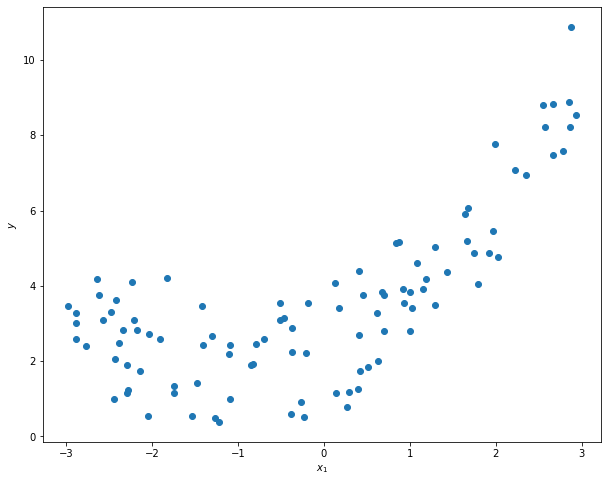

In [11]:
%matplotlib inline

plt.subplots(figsize = (10,8))
plt.scatter(X, y)
plt.xlabel('$x_1$')
plt.ylabel('$y$')



In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

lreg = LinearRegression()
lreg.fit(X,y)

poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)




LinearRegression()

Text(0, 0.5, '$y$')

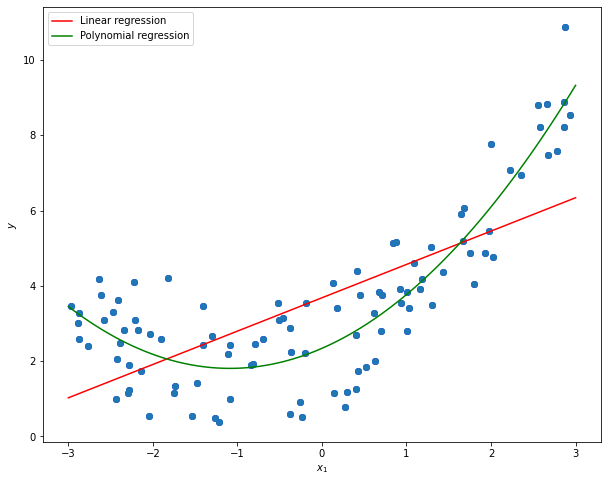

In [13]:
%matplotlib inline

x_axis = np.linspace(-3,3, 100).reshape(-1,1)
plt.subplots(figsize = (10,8))
plt.scatter(X, y, c = 'b')
plt.plot(x_axis, lreg.predict(x_axis), c = 'r', label = 'Linear regression')
plt.plot(x_axis , poly_reg.predict(poly.transform(x_axis)), c = 'g', label = 'Polynomial regression')
plt.scatter(X, y)
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$y$')




In [14]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
data = load_boston()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)





C:\Users\mxp180004\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datas

In [15]:
from  sklearn.preprocessing  import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

print(poly_reg.score(X_train_poly, y_train))
print(poly_reg.score(X_test_poly, y_test))





0.9520519609032729
0.6074721959666056


In [16]:
np.random.seed(0)
X = np.array([i*np.pi/180 for i in range(60,300,4)])
y = np.sin(X) + np.random.normal(0,0.15,len(X))




Text(0, 0.5, '$y$')

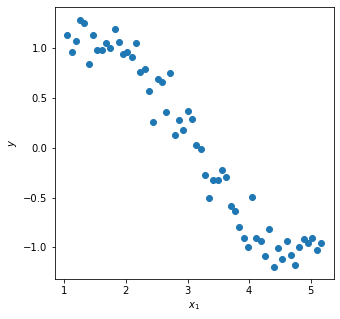

In [17]:
%matplotlib inline

plt.subplots(figsize = (5,5))
plt.scatter(X, y)
plt.xlabel('$x_1$')
plt.ylabel('$y$')




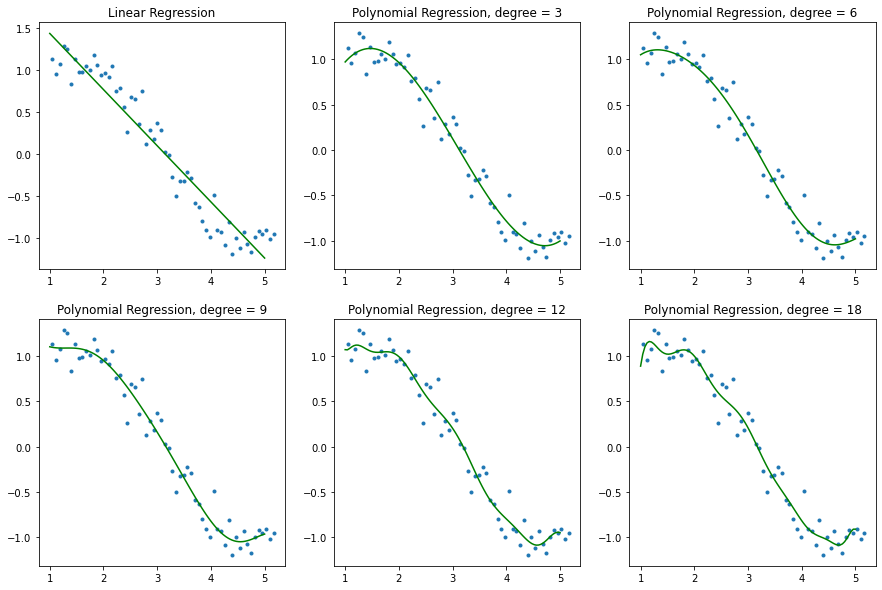

In [18]:
%matplotlib inline

x_values = np.linspace(1,5, 100).reshape(-1,1)

fig, axs = plt.subplots(2, 3, figsize = (15,10)) 
lreg = LinearRegression()
lreg.fit(X.reshape(-1,1),y)
plt.subplot(2, 3, 1)
plt.scatter(X,y, marker = '.')
plt.plot(x_values, lreg.predict(x_values), c = 'g')
plt.title('Linear Regression')

count = 2
for i in [3, 6, 9, 12, 18]:
    poly = PolynomialFeatures(degree = i)
    X_poly = poly.fit_transform(X.reshape(-1,1))
    lreg.fit(X_poly, y)
    
    plt.subplot(2, 3, count)
    plt.scatter(X,y, marker = '.')
    plt.plot(x_values, lreg.predict(poly.transform(x_values)), c = 'g')
    plt.title('Polynomial Regression, degree = '+str(i))
    count += 1
    
plt.savefig('polyreg.jpeg')





In [19]:
coef_list = []
intercept_list = []
for i in range(1,15):
    poly = PolynomialFeatures(degree = i)
    X_poly = poly.fit_transform(X.reshape(-1,1))
    lreg.fit(X_poly, y)
    coef_list.append(lreg.coef_)
    intercept_list.append(lreg.intercept_)
    

df = pd.DataFrame(coef_list)
df[0] = intercept_list

index_values = ['Linear Regression']
col_names = ['Intercept', 'X_1']
for i in range(2, 15):
    index_values.append('Polynomial Regression - degree '+str(i))
    col_names.append('X_'+str(i))
    
df.index = index_values
df.columns = col_names
df.style.apply(lambda x: ["background: orange" if np.abs(v) > 1000 else "" for v in x], axis = 1)







,Intercept,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14
Linear Regression,2.111974,-0.671468,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Polynomial Regression - degree 2,2.156081,-0.704931,0.005386,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Polynomial Regression - degree 3,-0.617104,2.641796,-1.179515,0.127134,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Polynomial Regression - degree 4,0.217684,1.264491,-0.407430,-0.050037,0.014257,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Polynomial Regression - degree 5,1.825248,-2.093897,2.186799,-0.984252,0.172593,-0.010193,nan,nan,nan,nan,nan,nan,nan,nan,nan
Polynomial Regression - degree 6,-1.011168,5.071453,-4.882293,2.518832,-0.752613,0.114050,-0.006665,nan,nan,nan,nan,nan,nan,nan,nan
Polynomial Regression - degree 7,7.777048,-20.958468,26.395999,-17.304292,6.431763,-1.381386,0.159577,-0.007644,nan,nan,nan,nan,nan,nan,nan
Polynomial Regression - degree 8,7.923230,-21.454982,27.099599,-17.848625,6.683889,-1.453201,0.171901,-0.008813,0.000047,nan,nan,nan,nan,nan,nan
Polynomial Regression - degree 9,-0.668471,11.452901,-26.626506,31.284835,-21.105369,8.649744,-2.194790,0.336515,-0.028500,0.001021,nan,nan,nan,nan,nan
Polynomial Regression - degree 10,-251.206984,1079.461889,-2000.379277,2115.556585,-1415.712004,627.488704,-186.964033,37.060884,-4.687800,0.342399,-0.010989,nan,nan,nan,nan
